<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50; position: relative;">
    --PRCP-1024-TexasSalaryPred--
    <span style="position: absolute; bottom: 10px; right: 15px; font-size: 16px; color: #2c3e50;0327201/25</span>
</div>


<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
   Predictive Model to Assist the Texas State Government in Analyzing Employee Payroll Informatiog
</div>



In [3]:
import pickle   
import pandas as pd  
from sklearn.model_selection import train_test_split 
from preprocessor import *  
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\pooji\DS-project\PRCP-1024-TexasSalaryPred\salary\salary.csv")

In [7]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
   Data Preprocessin & Data Cleaning.
</di>


In [10]:
df.nunique()

AGENCY                        113
AGENCY NAME                   113
LAST NAME                   38675
FIRST NAME                  23559
MI                             27
CLASS CODE                   1481
CLASS TITLE                  1422
ETHNICITY                       6
GENDER                          2
STATUS                         11
EMPLOY DATE                  6295
HRLY RATE                     206
HRS PER WK                     58
MONTHLY                     40552
ANNUAL                      40554
STATE NUMBER               149465
duplicated                      1
multiple_full_time_jobs         1
combined_multiple_jobs          1
summed_annual_salary           15
hide_from_search                1
dtype: int64

In [12]:
df.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [14]:
df.shape

(149481, 21)

In [ ]:
df.describe()

In [16]:
df.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

In [18]:
df.duplicated().sum()

0

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Remove unwanted features and similar features, such as 'class code' and 'class title','AGENCY' and 'AGENCY NAME' into a single column since they appear redundant.</li>
    </ul>
</div>iv>


In [21]:
df = df.drop(columns=[
    'MI','AGENCY','CLASS CODE', 'LAST NAME', 'FIRST NAME',
    'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 
    'summed_annual_salary', 'hide_from_search'
])

In [23]:
df.nunique()

AGENCY NAME        113
CLASS TITLE       1422
ETHNICITY            6
GENDER               2
STATUS              11
EMPLOY DATE       6295
HRLY RATE          206
HRS PER WK          58
MONTHLY          40552
ANNUAL           40554
STATE NUMBER    149465
dtype: int64

In [25]:
df.isnull().sum()

AGENCY NAME     0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64

In [27]:
df.shape

(149481, 11)

In [29]:
df.dtypes

AGENCY NAME      object
CLASS TITLE      object
ETHNICITY        object
GENDER           object
STATUS           object
EMPLOY DATE      object
HRLY RATE       float64
HRS PER WK      float64
MONTHLY         float64
ANNUAL          float64
STATE NUMBER      int64
dtype: object

In [31]:
df = df.rename(columns={
    'CLASS TITLE': 'Job_Title',
    'ETHNICITY': 'Ethnicity',
    'GENDER': 'Gender',
    'STATUS': 'Employ_Status',
    'EMPLOY DATE': 'Employ_Date',
    'HRLY RATE': 'Hourly_Rate',
    'HRS PER WK': 'Hours_Per_Week',
    'STATE NUMBER' : 'state_num',
    'MONTHLY': 'Monthly_Salary',
    'ANNUAL': 'Annual_Salary',
    'AGENCY NAME' : 'agency_name'
})

In [33]:
df.head(2)

,agency_name,Job_Title,Ethnicity,Gender,Employ_Status,Employ_Date,Hourly_Rate,Hours_Per_Week,Monthly_Salary,Annual_Salary,state_num
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>These approaches can help reduce the complexity of the features, making it easier to analyze and model without losing valuable information.</li>
    </ul>
</div>

In [36]:
df['agency_name'].value_counts()

agency_name
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: count, Length: 113, dtype: int64

In [38]:
agency_name_to_remove = df['agency_name'].value_counts()[df['agency_name'].value_counts() < 200]
df['agency_name'] = df['agency_name'].replace(agency_name_to_remove.index, 'Others')
df['agency_name'].value_counts()

agency_name
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
TEXAS WORKFORCE COMMISSION                             4653
OFFICE OF THE ATTORNEY GENERAL                         4141
Others                                                 3971
DEPARTMENT OF STATE HEALTH SERVICES                    3129
PARKS AND WILDLIFE DEPARTMENT                          3060
COMPTROLLER OF PUBLIC ACCOUNTS                         2748
TEXAS COMMISSION ON ENVIRONMENTAL QUALITY              2693
TEXAS JUVENILE JUSTICE DEPARTMENT                      2055
TEXAS DEPARTMENT OF INSURANCE                          1278
COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION      1033
TEXAS EDUCATION AGENCY                                  967
RAILROAD COMMISSION         

In [39]:
df['state_num'].value_counts()

state_num
127717     2
1049439    2
193187     2
949488     2
97642      2
          ..
124412     1
1129493    1
20632      1
1197251    1
103583     1
Name: count, Length: 149465, dtype: int64

In [40]:
df['Job_Title'].value_counts()

Job_Title
CORREC  OFFICER IV                                    9267
CORREC  OFFICER V                                     7895
CORREC OFFCR III                                      4718
TEXAS WORKS ADVISOR II                                3646
DIRECT SUPPORT PROFESSIONAL I                         3307
                                                      ... 
CHAIR,PARDONS AND PAROLES                                1
STATISTICIAN II                                          1
EX DIRECTOR TDCJ                                         1
PAYROLL SPECIALIST I                                     1
DEPUTY DIR/APPS MGR                                      1
Name: count, Length: 1422, dtype: int64

In [42]:
Job_Title_to_remove = df['Job_Title'].value_counts()[df['Job_Title'].value_counts() < 150]
df['Job_Title'] = df['Job_Title'].replace(Job_Title_to_remove.index, 'Others')
df['Job_Title'].value_counts()

Job_Title
Others                                                30777
CORREC  OFFICER IV                                     9267
CORREC  OFFICER V                                      7895
CORREC OFFCR III                                       4718
TEXAS WORKS ADVISOR II                                 3646
                                                      ...  
COOK III                                                152
DIRECTOR V                                              152
PURCHASER IV                                            152
CHILD SUPPORT TECHN II                                  152
WORKFORCE DEV SPECIALIST II                             150
Name: count, Length: 190, dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>For the Ethnicity column, since most of the categories have a fairly high count (e.g., WHITE, BLACK, HISPANIC), removing or grouping anything might significantly reduce the diversity of data, especially for categories like ASIAN, OTHER, and AM INDIAN that have fewer records.</li>
        <li>Removing or grouping any of these groups would distort the representation of ethnic diversity in your dataset.</li>
    </ul>
</div>

In [46]:
df['Ethnicity'] = df['Ethnicity'].str.strip()

In [47]:
df.Ethnicity.unique()

array(['WHITE', 'HISPANIC', 'BLACK', 'OTHER', 'AM INDIAN', 'ASIAN'],
      dtype=object)

In [48]:
df['Ethnicity'].value_counts()

Ethnicity
WHITE        67142
HISPANIC     40585
BLACK        35853
ASIAN         4268
OTHER          921
AM INDIAN      712
Name: count, dtype: int64

In [49]:
df['Employ_Status'].value_counts()

Employ_Status
CRF - CLASSIFIED REGULAR FULL-TIME          142502
URF - UNCLASSIFIED REGULAR FULL-TIME          2363
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
ERP - EXEMPT REGULAR PART-TIME                   1
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
Name: count, dtype: int64

In [50]:
Employ_Status_to_remove = df['Employ_Status'].value_counts()[df['Employ_Status'].value_counts() < 50]
df['Employ_Status'] = df['Employ_Status'].replace(Employ_Status_to_remove.index, 'Others')
df['Employ_Status'].value_counts()

Employ_Status
CRF - CLASSIFIED REGULAR FULL-TIME          142502
URF - UNCLASSIFIED REGULAR FULL-TIME          2363
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
Others                                          35
Name: count, dtype: int64

In [51]:
df['Employ_Date'].value_counts()

Employ_Date
09/01/17    12359
09/01/16     3261
09/01/04     1529
06/01/20     1171
02/01/20      767
            ...  
03/14/06        1
05/28/14        1
03/22/19        1
04/20/12        1
09/22/89        1
Name: count, Length: 6295, dtype: int64

In [59]:
Employ_Date_to_remove = df['Employ_Date'].value_counts()[df['Employ_Date'].value_counts() < 150]
df = df[~df['Employ_Date'].isin(Employ_Date_to_remove.index)]
df['Employ_Date'].value_counts()

Employ_Date
09/01/17    12359
09/01/16     3261
09/01/04     1529
06/01/20     1171
02/01/20      767
            ...  
06/01/96      152
12/11/17      151
06/01/15      150
10/01/07      150
05/16/16      150
Name: count, Length: 174, dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li> Group by Year</li>
        <li>This approach helps to reduce the number of unique values and makes the data easier to interpret.</li>
        <li> Convert 'Employ_Year' to datetime</li>
        <li>We can't use date-time values in plots if they haven't been converted to datetime format.</li>
    </ul>
</div>


In [62]:
df['Employ_Date'] = pd.to_datetime(df['Employ_Date'], format='%m/%d/%y')
df['Employ_Year'] = df['Employ_Date'].dt.to_period('Y')
df['Employ_Year'] = df['Employ_Year'].dt.to_timestamp()
df['Employ_Year'] = df['Employ_Year'].dt.strftime('%Y')
print(df['Employ_Year'].value_counts())

Employ_Year
2019    18908
2017    15164
2020    13144
2018    12902
2016     5039
2004     1529
2015      796
2011      660
2013      341
2009      214
2005      202
2014      158
1996      152
2007      150
Name: count, dtype: int64


In [63]:
df.dtypes

agency_name               object
Job_Title                 object
Ethnicity                 object
Gender                    object
Employ_Status             object
Employ_Date       datetime64[ns]
Hourly_Rate              float64
Hours_Per_Week           float64
Monthly_Salary           float64
Annual_Salary            float64
state_num                  int64
Employ_Year               object
dtype: object

In [66]:
df=df.drop('Employ_Date',axis=1)

In [68]:
df.dtypes

agency_name        object
Job_Title          object
Ethnicity          object
Gender             object
Employ_Status      object
Hourly_Rate       float64
Hours_Per_Week    float64
Monthly_Salary    float64
Annual_Salary     float64
state_num           int64
Employ_Year        object
dtype: object

In [70]:
df['Hourly_Rate'].value_counts()

Hourly_Rate
0.00000     68356
18.00000       98
19.00000       94
12.50000       63
13.50000       61
            ...  
11.44324        1
34.20696        1
76.34569        1
19.16890        1
17.00000        1
Name: count, Length: 132, dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li> the value 0.00000 occurring 68356 times is likely problematic, especially considering that it appears to be a placeholder or an error (i.e., it could represent missing or invalid values). Better to drop that feature. </li>
    </ul>
</div>

In [73]:
df=df.drop('Hourly_Rate',axis=1)

In [75]:
df['Hours_Per_Week'].value_counts()

Hours_Per_Week
40.00    68237
20.00      718
30.00       79
24.00       60
29.00       49
19.00       48
35.00       35
16.00       17
10.00       16
25.00       12
32.00       11
8.00        10
36.25        9
39.60        8
4.00         6
19.20        5
15.00        4
5.00         3
12.00        3
36.00        2
50.00        2
60.00        2
18.00        2
23.20        2
70.00        2
6.00         1
36.24        1
13.50        1
14.00        1
38.80        1
19.60        1
29.30        1
4.15         1
28.00        1
3.35         1
5.20         1
8.40         1
26.93        1
26.00        1
11.00        1
7.00         1
23.00        1
Name: count, dtype: int64


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li> For better clarity, grouping them into specific categories is the best approach. </li>
    </ul>
</div>

In [78]:
bins = [0, 20, 35, 45, float('inf')]  
labels = ['Part-Time', 'Near Full-Time', 'Full-Time', 'Overtime']  
df['Hours_week_Category'] = pd.cut(df['Hours_Per_Week'], bins=bins, labels=labels, right=False)

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>  In the above, it is showing something similar to Employ_Status</li>
        <li> Remove "Hours_week_Category" because it is redundant and adds complexity without providing additional useful information compared to "Employ_Status." "Employ_Status" simplifies the data while retaining the key distinctions needed for analysis. </li>
    </ul>
</div>

In [81]:
df=df.drop(['Hours_week_Category'],axis=1)

In [83]:
df=df.drop(['Hours_Per_Week'],axis=1)

In [85]:
df['Monthly_Salary'].value_counts()

Monthly_Salary
3284.27     4326
3019.84     4254
3816.65     1358
1962.84     1329
2632.29     1292
            ... 
3144.61        1
2454.83        1
4178.96        1
4955.31        1
14665.83       1
Name: count, Length: 17254, dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li> Again lets turns continuous salary data into simple categories (ranges), which makes it easier to analyze and understand.
</li>
    </ul>
</div>

In [88]:
import pandas as pd
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500,5000, float('inf')]  
labels = ['Below 500', '500-1k', '1k-1.5k', '1.5k-2k','2k-2.5k','2.5k-3k','3k-3.5k','3.5k-4k','4k-4.5k','4.5k-5k', 'Above 5k']
df['Salary_Range'] = pd.cut(df['Monthly_Salary'], bins=bins, labels=labels, right=False)


In [90]:
df['Salary_Range'].value_counts()

Salary_Range
3k-3.5k      16995
Above 5k     11036
2k-2.5k      10092
2.5k-3k       8341
3.5k-4k       8081
4k-4.5k       5388
1.5k-2k       4933
4.5k-5k       4104
1k-1.5k        245
500-1k         131
Below 500       13
Name: count, dtype: int64

In [92]:
df=df.drop('Monthly_Salary',axis=1)

In [94]:
df.head()

,agency_name,Job_Title,Ethnicity,Gender,Employ_Status,Annual_Salary,state_num,Employ_Year,Salary_Range
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,114549.84,59115,2020,Above 5k
3,OFFICE OF COURT ADMINISTRATION ...,Others,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,16857.24,59115,2018,1k-1.5k
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,39411.24,165030,2020,3k-3.5k
5,OFFICE OF THE ATTORNEY GENERAL ...,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,154788.00,1177785,2020,Above 5k
6,TEXAS DEPARTMENT OF TRANSPORTATION ...,CONTRACT SPEC IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,70026.00,1085586,2020,Above 5k




<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
What departments/roles have the biggest wage disparities between managers and employees?</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li> all the titles above listed can relate to managerial roles, but they each typically come with different levels of responsibility and focus.
</li>
    </ul>
</div>

In [98]:
manager_roles = [
    'DIRECTOR', 'MANAGER', 'SUPERVISOR', 'CHIEF', 'EXECUTIVE', 'LEAD', 'COORDINATOR', 'DEPARTMENT HEAD', 'ADMINISTRATOR'
]

df['is_manager'] = df['Job_Title'].apply(lambda x: any(role in x for role in manager_roles))

average_salaries = df.groupby(['Job_Title', 'is_manager'])['Annual_Salary'].mean().unstack(fill_value=0)

if len(average_salaries.columns) == 2:
    manager_column = average_salaries.columns[1] 
    employee_column = average_salaries.columns[0]  
    
    average_salaries['wage_disparity'] = average_salaries[manager_column] - average_salaries[employee_column]
    
    sorted_disparities = average_salaries[['wage_disparity']].sort_values(by='wage_disparity', ascending=False)
    
sorted_disparities.head(10)

is_manager,wage_disparity
Job_Title,
DIRECTOR VI,160364.840000
DIRECTOR V,144265.284878
DIRECTOR IV,130987.990130
DIRECTOR III,119412.264151
DIRECTOR II,103936.611256
DIRECTOR I,94506.839200
PROJECT MANAGER IV,94177.502034
PROJECT MANAGER III,79857.681818
PROGRAM SUPERVISOR VI,66756.483478


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li> The data shows that higher-level managerial positions, particularly Directors and Project Managers, have the largest wage disparities compared to employees. 
</li>
    </ul>
</div>

In [101]:
df=df.drop(columns=['is_manager'],axis=1)



<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
Have salaries and total compensations for some roles/ departments/ head-count changed over time?</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li> Filter for top job titles (for example, the top 5 highest-paid roles)</li>
    </ul>
</div>

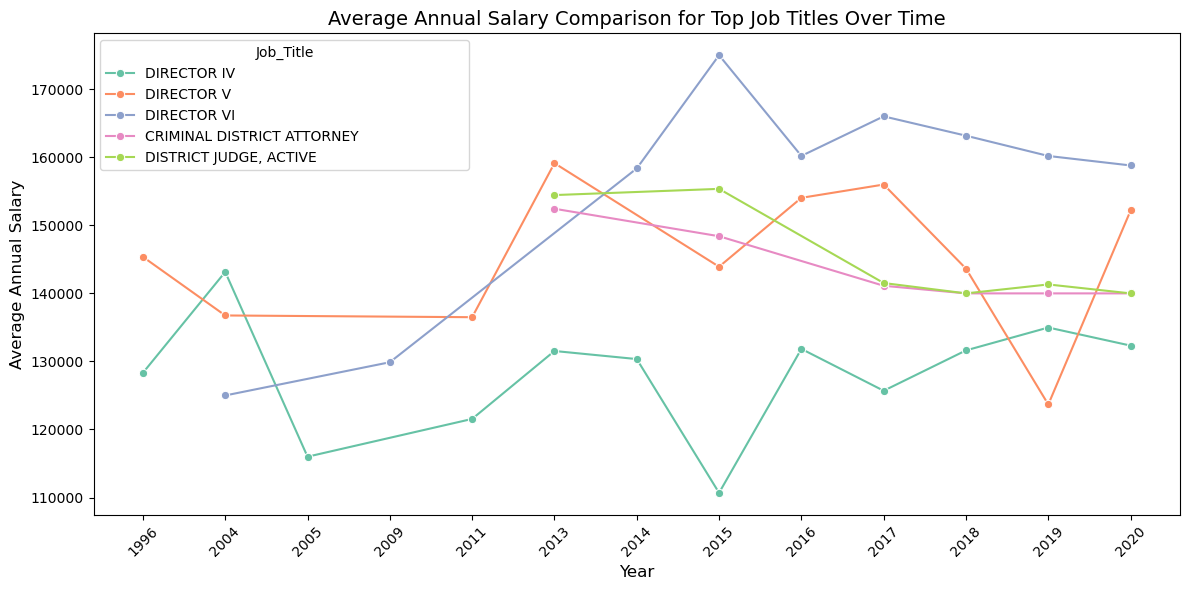

In [104]:
df_grouped = df.groupby(['Employ_Year', 'Job_Title'])['Annual_Salary'].mean().reset_index()

top_job_titles = df_grouped.groupby('Job_Title')['Annual_Salary'].mean().nlargest(5).index
df_filtered = df_grouped[df_grouped['Job_Title'].isin(top_job_titles)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Employ_Year', y='Annual_Salary', hue='Job_Title', marker='o', palette='Set2')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Annual Salary', fontsize=12)
plt.title('Average Annual Salary Comparison for Top Job Titles Over Time', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li> Filter for top job titles (for example, the top 5 highest-paid roles)</li>
        <li> Have salaries and total compensations for some roles/ departments/ head-count changed over time </li>
        <li> The graph compares salaries for "Director III," "Director IV," "Director VI," "Criminal District Attorney," and "District Judge, Active.</li>
        <li>Salary Trends:
The salaries for most job titles have generally increased over the period shown, with some fluctuations.

</li>
        <li>Highest Earners:
"Director VI" consistently has the highest average salary throughout the years.

</li>
        <li>Salary Variations:
The "District Judge, Active" position experiences the most significant salary fluctuations.
Crossovers:
</li>
        <li>Crossovers:
There are instances where certain job titles experience salary crossovers. For instance, "Director V" surpasses "Criminal District Attorney" in salary around 2013.</li>
    </ul>
</div>


<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Exploratory Data Analysis (EDA)</div>

In [108]:
df.dtypes

agency_name        object
Job_Title          object
Ethnicity          object
Gender             object
Employ_Status      object
Annual_Salary     float64
state_num           int64
Employ_Year        object
Salary_Range     category
dtype: object

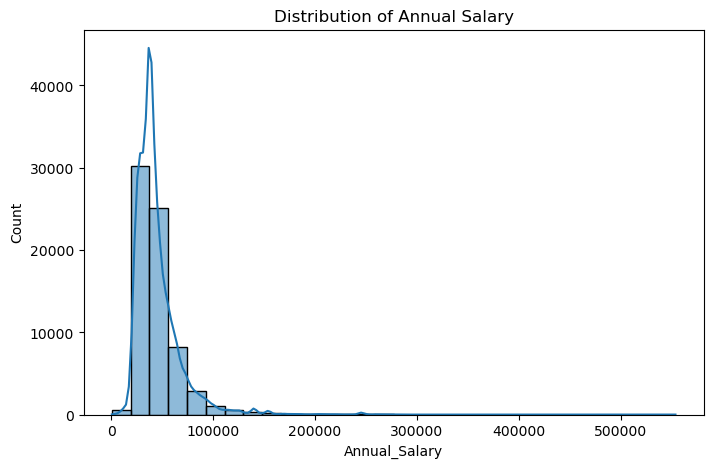

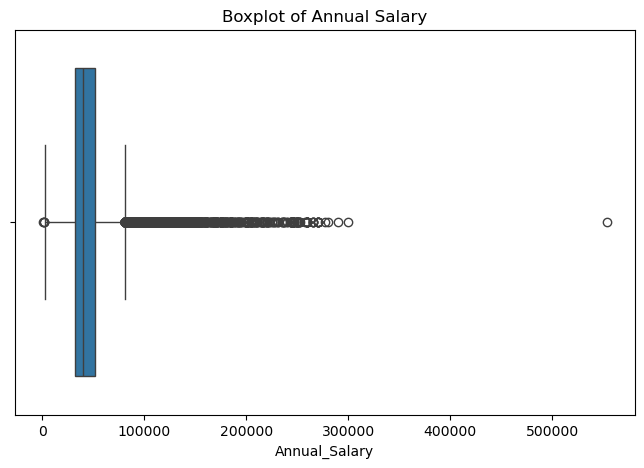

In [110]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Annual_Salary'], bins=30, kde=True)
plt.title('Distribution of Annual Salary')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Annual_Salary'])
plt.title('Boxplot of Annual Salary')
plt.show()

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Handling the outliers in the Annual_Salary</li>
    </ul>
</div>

In [113]:
q1 = df['Annual_Salary'].quantile(0.25)
q3 = df['Annual_Salary'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5* iqr
lower = q1 + 1.5* iqr

In [114]:
outliers_lower_bound = df[(df['Annual_Salary'] < lower)]

In [115]:
outliers_upper_bound = df[(df['Annual_Salary'] > upper)]

<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
Who are the outliers in the salaries?</div>


In [118]:
outliers_lower_bound

,agency_name,Job_Title,Ethnicity,Gender,Employ_Status,Annual_Salary,state_num,Employ_Year,Salary_Range
3,OFFICE OF COURT ADMINISTRATION ...,Others,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,16857.24,59115,2018,1k-1.5k
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,39411.24,165030,2020,3k-3.5k
9,DEPARTMENT OF STATE HEALTH SERVICES ...,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,41367.00,129635,2019,3k-3.5k
10,DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES ...,CHILD PROTECTIVE SVCS SPEC I ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,45799.80,1055383,2020,3.5k-4k
11,HEALTH AND HUMAN SERVICES COMMISSION ...,Others,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,30174.96,1196278,2020,2.5k-3k
...,...,...,...,...,...,...,...,...,...
149463,STATE PRESERVATION BOARD ...,CUSTODIAN I ...,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,27559.92,801404,2019,2k-2.5k
149465,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,OTHER,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,12480.00,1246178,2019,1k-1.5k
149467,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,WHITE,MALE,CTF - CLASSIFIED TEMPORARY FULL-TIME,23919.96,1142494,2018,1.5k-2k
149468,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,12480.00,1127553,2018,1k-1.5k


In [122]:
outliers_upper_bound

,agency_name,Job_Title,Ethnicity,Gender,Employ_Status,Annual_Salary,state_num,Employ_Year,Salary_Range
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,114549.84,59115,2020,Above 5k
5,OFFICE OF THE ATTORNEY GENERAL ...,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,154788.00,1177785,2020,Above 5k
7,Others,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,120000.00,147334,2020,Above 5k
38,SENATE ...,Others,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,111000.00,105981,2017,Above 5k
41,SENATE ...,LEGISLATIVE PROFESSIONAL ...,HISPANIC,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,96000.00,1119596,2019,Above 5k
...,...,...,...,...,...,...,...,...,...
149119,TEXAS HISTORICAL COMMISSION ...,DIRECTOR I ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,101858.40,187395,2019,Above 5k
149122,TEXAS HISTORICAL COMMISSION ...,MGR V ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,87600.00,167980,2019,Above 5k
149179,TEXAS HISTORICAL COMMISSION ...,MGR V ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,85600.08,1246175,2019,Above 5k
149445,STATE PRESERVATION BOARD ...,PROJECT MANAGER IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,90000.00,1151340,2018,Above 5k


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>It looks like the outliers are associated with various government-related roles and managerial/executive positions across different departments.</li>
    </ul>
</div>

In [126]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p, validate=True)

df['Log_Annual_Salary'] = log_transformer.fit_transform(df[['Annual_Salary']])

df[['Annual_Salary', 'Log_Annual_Salary']].head()

,Annual_Salary,Log_Annual_Salary
2,114549.84,11.648774
3,16857.24,9.732595
4,39411.24,10.581832
5,154788.00,11.949818
6,70026.00,11.156636


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>If these positions are typically low-paying or entry-level roles, then these salaries are true values rather than outliers.</li>
        <li>Applying a log transformation makes sense for salary data that contains both low-paying entry-level roles and high-paying government/managerial roles</li>
        <li>This operation effectively replaces all salaries below the lower_bound with the value of the lower_bound. This is typically done when you want to eliminate extreme low-value outliers and bring them to a more reasonable threshold for analysis.</li>
        <li>Applying log transformation to an upper-bound-heavy variable will compress the high values, making differences between them less extreme while maintaining the original order.</li>
        <li>The log transformation will not remove any data. Instead, it transforms the values in a way that compresses the range of the data, especially for higher values. while still maintaining the relative difference for lower salaries.</li>
    </ul>
</div>

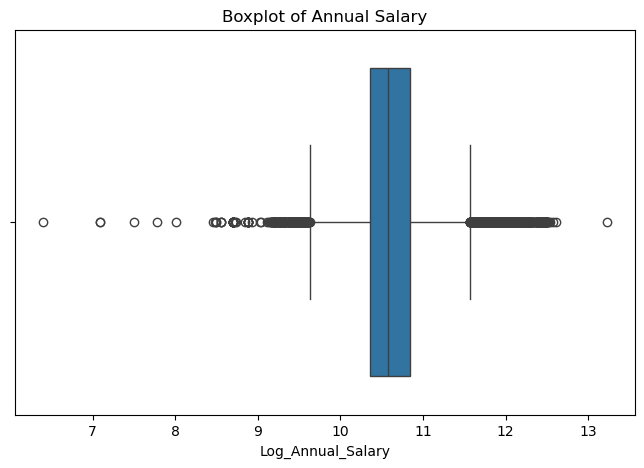

In [129]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Log_Annual_Salary'])
plt.title('Boxplot of Annual Salary')
plt.show()

<Figure size 800x600 with 0 Axes>

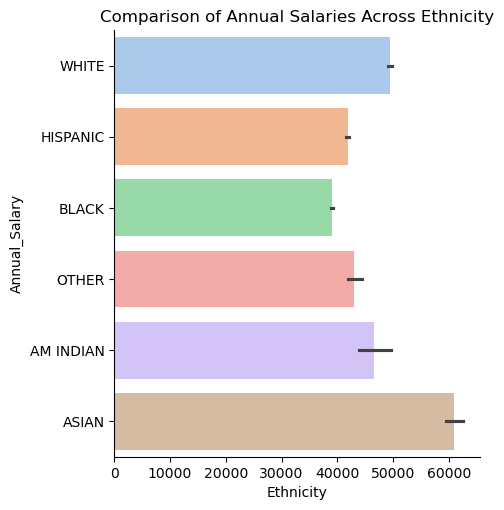

In [131]:
plt.figure(figsize=(8, 6))
sns.catplot(y=df['Ethnicity'],x=df['Annual_Salary'],hue=df['Ethnicity'],kind='bar',palette='pastel') 
plt.xlabel('Ethnicity')
plt.ylabel('Annual_Salary')
plt.title('Comparison of Annual Salaries Across Ethnicity')
plt.show()

<Figure size 800x600 with 0 Axes>

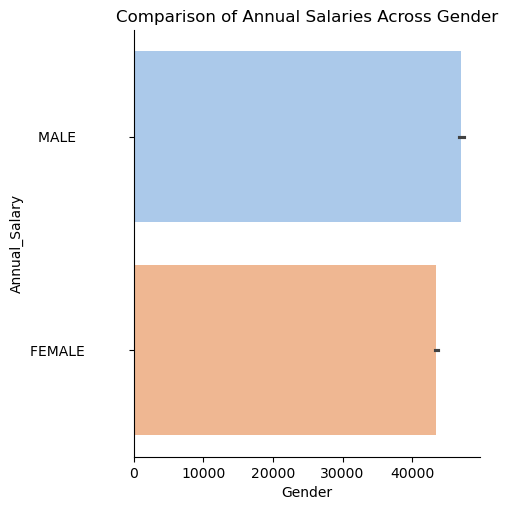

In [132]:
plt.figure(figsize=(8, 6))
sns.catplot(y=df['Gender'],x=df['Annual_Salary'],hue=df['Gender'],kind='bar',palette='pastel') 
plt.xlabel('Gender')
plt.ylabel('Annual_Salary')
plt.title('Comparison of Annual Salaries Across Gender')
plt.show()

<Figure size 800x600 with 0 Axes>

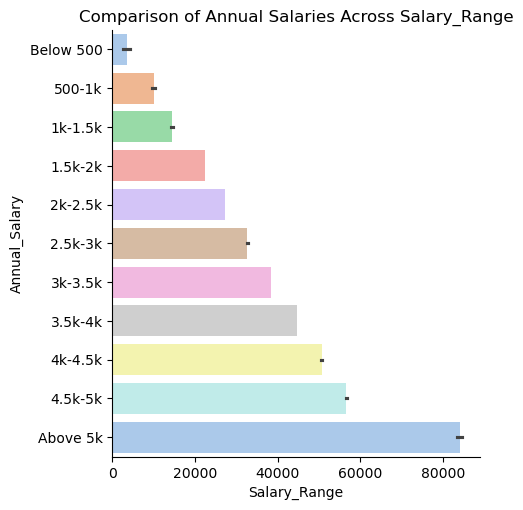

In [133]:
plt.figure(figsize=(8, 6))
sns.catplot(y=df['Salary_Range'],x=df['Annual_Salary'],hue=df['Salary_Range'],kind='bar',palette='pastel') 
plt.xlabel('Salary_Range')
plt.ylabel('Annual_Salary')
plt.title('Comparison of Annual Salaries Across Salary_Range')
plt.show()

<Figure size 800x600 with 0 Axes>

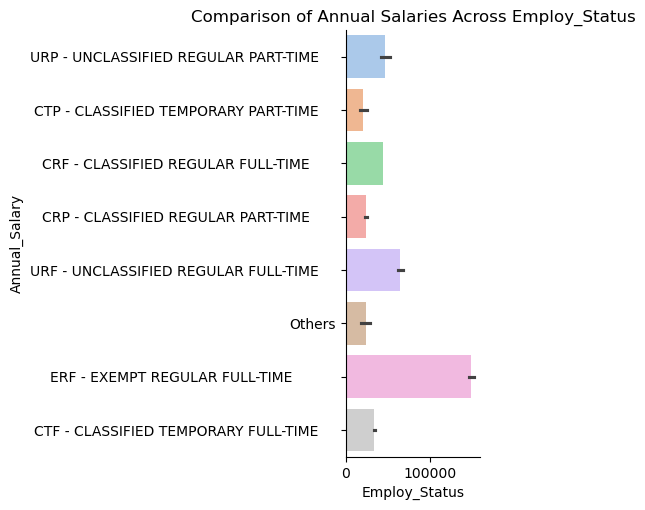

In [134]:
plt.figure(figsize=(8, 6))
sns.catplot(y=df['Employ_Status'],x=df['Annual_Salary'],hue=df['Employ_Status'],kind='bar',palette='pastel') 
plt.xlabel('Employ_Status')
plt.ylabel('Annual_Salary')
plt.title('Comparison of Annual Salaries Across Employ_Status')
plt.show()

In [135]:
df.dtypes

agency_name            object
Job_Title              object
Ethnicity              object
Gender                 object
Employ_Status          object
Annual_Salary         float64
state_num               int64
Employ_Year            object
Salary_Range         category
Log_Annual_Salary     float64
dtype: object

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Encoding is crucial because it transforms non-numeric, categorical features into numeric values, making them ready for machine learning models, which can only work with numerical data.</li>
    </ul>
</div>

In [138]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = ['agency_name', 'Job_Title', 'Ethnicity', 'Gender', 'Employ_Status', 'Salary_Range','Employ_Year']

for col in categorical_columns:
    if df[col].dtype == 'period[M]':  
        df[col] = df[col].astype(str)  
    df[col] = le.fit_transform(df[col])  

In [139]:
df.dtypes

agency_name            int32
Job_Title              int32
Ethnicity              int32
Gender                 int32
Employ_Status          int32
Annual_Salary        float64
state_num              int64
Employ_Year            int32
Salary_Range           int32
Log_Annual_Salary    float64
dtype: object

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>The data has been preprocessed, and unnecessary columns have been removed, making the dataset ready for model training.</li>
        <li>The features have been selected based on their relevance and correlation to the target variable, ensuring the model's effectiveness.</li>
    </ul>
</div>


In [141]:
df.columns

Index(['agency_name', 'Job_Title', 'Ethnicity', 'Gender', 'Employ_Status',
       'Annual_Salary', 'state_num', 'Employ_Year', 'Salary_Range',
       'Log_Annual_Salary'],
      dtype='object')

<Axes: >

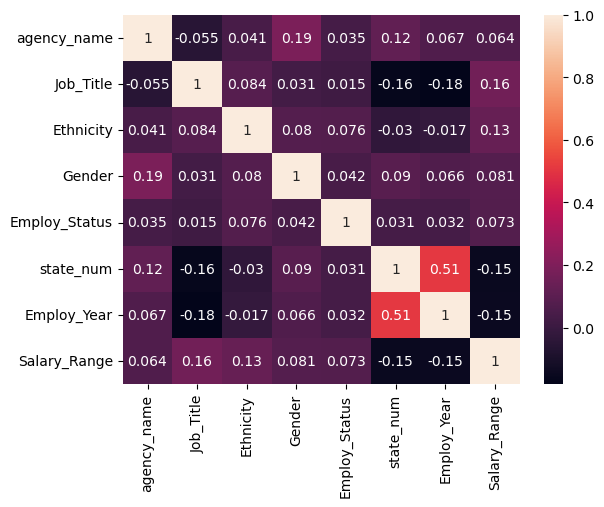

In [142]:
df_heatmap = df.drop(['Log_Annual_Salary','Annual_Salary'], axis=1)  
sns.heatmap(df_heatmap.corr(), annot=True)  

In [143]:
print(df.corr()['Log_Annual_Salary'].sort_values(ascending=False))

Log_Annual_Salary    1.000000
Annual_Salary        0.925571
Salary_Range         0.861794
Job_Title            0.183697
Ethnicity            0.142654
Gender               0.079937
Employ_Status        0.067857
agency_name          0.033248
Employ_Year         -0.179142
state_num           -0.181001
Name: Log_Annual_Salary, dtype: float64


In [145]:
df.shape

(69359, 10)

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Model Building</div>

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Since Annual_Salary is essentially contained within Log_Annual_Salary, it’s better to remove Annual_Salary to avoid redundancy.</li>
        <li>Salary_Range might still contain some useful information, though it has some correlation with Log_Annual_Salary, so its worth keeping.</li>
        <li>both Annual_Salary (0.93) and Salary_Range (0.86) are positively correlated with Log_Annual_Salary, which means that as one increases</li>
    </ul>
</div>


In [167]:
x = df.drop(['Log_Annual_Salary', 'Annual_Salary'], axis=1)
y = df[['Log_Annual_Salary']]

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [171]:
x_train.shape

(55487, 8)

In [173]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)  

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        These are the models I am going to use on my datasets:
        <li>Linear Regression: Simple, interpretable, good starting point.</li>
        <li>Random Forest Regressor: Non-linear, captures complex relationships.</li>
        <li>Gradient Boosting Regressor: Strong performance, reliable for regression tasks.</li>
        <li>XGBoost/LightGBM: State-of-the-art, excellent for large datasets.</li>
        <li>Neural Networks: Complex, useful with enough data and resources.</li>
    </ul>
</div>div>
div>


<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * LinearRegression *</div>>


In [177]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_train_lr = model.predict(x_train_scaled)
y_pred_test_lr = model.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_pred_train_lr)
train_mae = mean_absolute_error(y_train, y_pred_train_lr)
train_mse = mean_squared_error(y_train, y_pred_train_lr)

test_r2 = r2_score(y_test, y_pred_test_lr)
test_mae = mean_absolute_error(y_test, y_pred_test_lr)
test_mse = mean_squared_error(y_test, y_pred_test_lr)

In [181]:
print("Training R-squared:", train_r2)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)

Training R-squared: 0.7467504182352269
Training MAE: 0.14543445544156935
Training MSE: 0.0416369158785203


In [183]:
print("Test R-squared:", test_r2)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)

Test R-squared: 0.7571615572817799
Test MAE: 0.14487660573627395
Test MSE: 0.040443178314135804


In [185]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

MSE for each fold: [0.06066821 0.03977557 0.04344851 0.02636555 0.05595612]
Average MSE across all folds: 0.045242793815095404



<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * Hyperparameter tunning LinearRegression *</div>

In [187]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_values = [0.01, 0.1, 1, 10, 100]  
solver_options = ['auto', 'svd', 'cholesky', 'lsqr', 'saga']  

param_grid = {
    'alpha': alpha_values,
    'solver': solver_options
}

ridge = Ridge()

ridge_cv = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,  
    verbose=2,
    scoring='neg_mean_squared_error',  
    n_jobs=-1
)

ridge_cv.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']},
             scoring='neg_mean_squared_error', verbose=2)

In [189]:
print("Best Parameters:", ridge_cv.best_params_)

Best Parameters: {'alpha': 0.01, 'solver': 'saga'}


In [191]:
model_lr_t = Ridge(alpha=0.01, solver='saga')
model_lr_t.fit(x_train_scaled, y_train)

Ridge(alpha=0.01, solver='saga')

In [193]:
y_pred_train_lr_t = model_lr_t.predict(x_train_scaled)
y_pred_test_lr_t = model_lr_t.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_pred_train_lr_t)
train_mae = mean_absolute_error(y_train, y_pred_train_lr_t)
train_mse = mean_squared_error(y_train, y_pred_train_lr_t)

test_r2 = r2_score(y_test, y_pred_test_lr_t)
test_mae = mean_absolute_error(y_test, y_pred_test_lr_t)
test_mse = mean_squared_error(y_test, y_pred_test_lr_t)

In [195]:
print("Training R-squared:", train_r2)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)

Training R-squared: 0.7467504080733086
Training MAE: 0.14543689720947545
Training MSE: 0.04163691754924738


In [197]:
print("Test R-squared:", test_r2)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)

Test R-squared: 0.7571600911881898
Test MAE: 0.14487863721188385
Test MSE: 0.04044342248257893


In [199]:
cv_scores = cross_val_score(model_lr_t, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

MSE for each fold: [0.23094034 0.20129684 0.17756694 0.09689046 0.11753761]
Average MSE across all folds: 0.16484643871942112


<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * Random Forest Regressor *</div>

In [202]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [204]:
y_pred_test_rf = model_rf.predict(x_test_scaled)
y_pred_train_rf = model_rf.predict(x_train_scaled)


train_r2 = r2_score(y_train, y_pred_train_rf)
train_mae = mean_absolute_error(y_train, y_pred_train_rf)
train_mse = mean_squared_error(y_train, y_pred_train_rf)

test_r2 = r2_score(y_test, y_pred_test_rf)
test_mae = mean_absolute_error(y_test, y_pred_test_rf)
test_mse = mean_squared_error(y_test, y_pred_test_rf)


In [206]:
print("Training R-squared:", train_r2)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)

Training R-squared: 0.9932489167864555
Training MAE: 0.01416259826151538
Training MSE: 0.001109949646875747


In [208]:
print("Test R-squared:", test_r2)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)

Test R-squared: 0.946791655162979
Test MAE: 0.03903008567929252
Test MSE: 0.008861507074234786


In [210]:
cv_scores = cross_val_score(model_rf, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

MSE for each fold: [0.0194319  0.01113182 0.00941044 0.00557351 0.01474845]
Average MSE across all folds: 0.012059224461820518


<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * Hyperparameter tunning of Random Forest Regressor *</div>

In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 50, 100],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}
rf_regressor = RandomForestRegressor(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_regressor, 
    param_distributions=random_grid,
    n_iter=100, 
    cv=3,  
    verbose=2, 
    random_state=42, 
    n_jobs=-1,  
    scoring='neg_mean_absolute_error'  )

rf_cv.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [213]:
print(f"Best parameters: {rf_cv.best_params_}")

Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}


In [347]:
rf_regressor1 = RandomForestRegressor(n_estimators= 200, min_samples_split= 10, min_samples_leaf= 2, max_features= 'log2', max_depth= 50, bootstrap= False)
rf_regressor1.fit(x_train_scaled, y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='log2',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200)

In [348]:
y_pred_train_rf_t = rf_regressor1.predict(x_train_scaled)
y_pred_test_rf_t = rf_regressor1.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_pred_train_rf_t)
train_mae = mean_absolute_error(y_train, y_pred_train_rf_t)
train_mse = mean_squared_error(y_train, y_pred_train_rf_t)

test_r2 = r2_score(y_test, y_pred_test_rf_t)
test_mae = mean_absolute_error(y_test, y_pred_test_rf_t)
test_mse = mean_squared_error(y_test, y_pred_test_rf_t)

In [349]:
print(f"Training R-squared: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

Training R-squared: 0.9791321394496152
Training MAE: 0.025450934417357286
Training MSE: 0.003430897489529146


In [350]:
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

Test R-squared: 0.9487300911306403
Test MAE: 0.040125121863628196
Test MSE: 0.008538673050868766


In [351]:
cv_scores = cross_val_score(rf_regressor1, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

MSE for each fold: [0.02654919 0.00981945 0.00849309 0.00529896 0.01595624]
Average MSE across all folds: 0.013223387040276846



<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * Gradient Boosting Regressor *</div>

In [220]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train_scaled, y_train)  

GradientBoostingRegressor()

In [221]:
y_pred_train_gb = gbr.predict(x_train_scaled)
y_pred_test_gb = gbr.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_pred_train_gb)
train_mae = mean_absolute_error(y_train, y_pred_train_gb)
train_mse = mean_squared_error(y_train, y_pred_train_gb)

test_r2 = r2_score(y_test, y_pred_test_gb)
test_mae = mean_absolute_error(y_test, y_pred_test_gb)
test_mse = mean_squared_error(y_test, y_pred_test_gb)


In [222]:
print(f"Training R-squared: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

Training R-squared: 0.9380259049588597
Training MAE: 0.056204427233395436
Training MSE: 0.010189198196868698


In [223]:
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

Test R-squared: 0.9352954185736088
Test MAE: 0.05698153940657259
Test MSE: 0.010776131221552757


In [224]:
cv_scores = cross_val_score(gbr, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

MSE for each fold: [0.01950891 0.01262171 0.01193467 0.00680109 0.01090165]
Average MSE across all folds: 0.012353604594535217


<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * hyper parameter tunning Gradient Boosting Regressor *</div>

In [226]:
param_grid = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.4, 0.5, 0.6, 0.7],  
    'max_depth': [5, 6, 7, 8, 9, 10],  
    'n_estimators': [50, 65, 80, 100]  
}

gbr = GradientBoostingRegressor()

rcv = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_grid,
    scoring='r2',  
    n_iter=100,  
    cv=3, 
    verbose=2,
    n_jobs=-1  
)

rcv.fit(x_train_scaled, y_train)

cv_best_params = rcv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [227]:
print("Best parameters:", cv_best_params)

Best parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.06}


In [352]:
gbr_t = GradientBoostingRegressor(n_estimators=100, max_depth= 10, learning_rate=0.06)
gbr_t.fit(x_train_scaled, y_train)  

GradientBoostingRegressor(learning_rate=0.06, max_depth=10)

In [353]:
y_pred_train_gb_t = gbr_t.predict(x_train_scaled)
y_pred_test_gb_t = gbr_t.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_pred_train_gb_t)
train_mae = mean_absolute_error(y_train, y_pred_train_gb_t)
train_mse = mean_squared_error(y_train, y_pred_train_gb_t)

test_r2 = r2_score(y_test, y_pred_test_gb_t)
test_mae = mean_absolute_error(y_test, y_pred_test_gb_t)
test_mse = mean_squared_error(y_test, y_pred_test_gb_t)

In [354]:
print(f"Training R-squared: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

Training R-squared: 0.9698151860048391
Training MAE: 0.031980800182790245
Training MSE: 0.004962703402577229


In [355]:
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

Test R-squared: 0.9544508376128656
Test MAE: 0.03866509505264758
Test MSE: 0.007585919576250785


In [356]:
cv_scores = cross_val_score(gbr_t, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

MSE for each fold: [0.01758756 0.0088344  0.00803428 0.00440417 0.01411847]
Average MSE across all folds: 0.010595776688748854



<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * XGBoost *</div>

In [234]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [235]:
y_pred_train_xgbr = xgbr.predict(x_train_scaled)
y_pred_test_xgbr = xgbr.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_pred_train_xgbr)
train_mae = mean_absolute_error(y_train, y_pred_train_xgbr)
train_mse = mean_squared_error(y_train, y_pred_train_xgbr)

test_r2 = r2_score(y_test, y_pred_test_xgbr)
test_mae = mean_absolute_error(y_test, y_pred_test_xgbr)
test_mse = mean_squared_error(y_test, y_pred_test_xgbr)


In [236]:
print(f"Training R-squared: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

Training R-squared: 0.9664090717361191
Training MAE: 0.03545635064574243
Training MSE: 0.0055227046957325495


In [237]:
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

Test R-squared: 0.9540144352025551
Test MAE: 0.04048037665142271
Test MSE: 0.007658599586463954


In [238]:
cv_scores = cross_val_score(xgbr, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

MSE for each fold: [0.02213715 0.00899089 0.00823928 0.00485387 0.01280566]
Average MSE across all folds: 0.011405367553383993



<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * hyperparameter tunning XGBoost *</div>

In [240]:
param_grid = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.2],
    'max_depth': [5, 6, 7, 8, 9],
    'n_estimators': [50, 65, 80, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.2, 0.4],
    'reg_lambda': [0, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2, 0.4]
}

xgb_regressor = XGBRegressor(random_state=42, verbosity=0)

rcv = RandomizedSearchCV(
    estimator=xgb_regressor, 
    param_distributions=param_grid, 
    n_iter=100, 
    cv=3, 
    scoring='r2',  
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

rcv.fit(x_train_scaled, y_train)

cv_best_params = rcv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [241]:
print(f"Best parameters: {cv_best_params}")

Best parameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [242]:
xgbr_t=XGBRegressor(subsample= 1.0, reg_lambda=0, reg_alpha=0.1, n_estimators=50, max_depth= 9, learning_rate=0.1, gamma=0, colsample_bytree=0.8)
xgbr_t.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [243]:
y_pred_train_xgbr_t = xgbr_t.predict(x_train_scaled)
y_pred_test_xgbr_t = xgbr_t.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_pred_train_xgbr_t)
train_mae = mean_absolute_error(y_train, y_pred_train_xgbr_t)
train_mse = mean_squared_error(y_train, y_pred_train_xgbr_t)

test_r2 = r2_score(y_test, y_pred_test_xgbr_t)
test_mae = mean_absolute_error(y_test, y_pred_test_xgbr_t)
test_mse = mean_squared_error(y_test, y_pred_test_xgbr_t)

In [244]:
print(f"Training R-squared: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

Training R-squared: 0.9643369139550244
Training MAE: 0.03562586401124071
Training MSE: 0.005863389401378395


In [245]:
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

Test R-squared: 0.9559204687849311
Test MAE: 0.0390656962603903
Test MSE: 0.007341161971637007


In [246]:
cv_scores = cross_val_score(xgbr_t, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

MSE for each fold: [0.02017038 0.00874393 0.00808256 0.0051675  0.01363362]
Average MSE across all folds: 0.011159598394829145



<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * LightGBM *</div>

In [248]:
from lightgbm import LGBMRegressor
lgb_reg = LGBMRegressor()
lgb_reg.fit(x_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 55487, number of used features: 8
[LightGBM] [Info] Start training from score 10.618867


LGBMRegressor()

In [249]:
y_pred_train_lgb = lgb_reg.predict(x_train_scaled)
y_pred_test_lgb = lgb_reg.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_pred_train_lgb)
train_mae = mean_absolute_error(y_train, y_pred_train_lgb)
train_mse = mean_squared_error(y_train, y_pred_train_lgb)

test_r2 = r2_score(y_test, y_pred_test_lgb)
test_mae = mean_absolute_error(y_test, y_pred_test_lgb)
test_mse = mean_squared_error(y_test, y_pred_test_lgb)

In [250]:
print(f"Training R-squared: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

Training R-squared: 0.955604912410819
Training MAE: 0.04181289209798914
Training MSE: 0.0072990230210417265


In [251]:
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

Test R-squared: 0.9440017882509425
Test MAE: 0.04354816444868009
Test MSE: 0.009326141436624958


In [252]:
cv_scores = cross_val_score(lgb_reg, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 55487, number of used features: 8
[LightGBM] [Info] Start training from score 10.581739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 55487, number of used features: 8
[LightGBM] [Info] Start training from score 10.647838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,


<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * Hyper parameter tunning LightGBM *</div>

In [254]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10, 15],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

lgb_reg = LGBMRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=lgb_reg,
    param_distributions=param_grid,
    n_iter=50, 
    cv=3,  
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 55487, number of used features: 8
[LightGBM] [Info] Start training from score 10.618867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.1],
                                        'max_depth': [-1, 5, 10, 15],
                                        'min_child_samples': [5, 10, 20],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'num_leaves': [31, 50, 100],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [255]:
print(f"Best parameters: {random_search.best_params_}")

Best parameters: {'subsample': 1.0, 'num_leaves': 31, 'n_estimators': 500, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [256]:
lgb_reg_t = LGBMRegressor(subsample= 1.0, num_leaves=31, n_estimators= 500, min_child_samples= 5, max_depth= 5, learning_rate= 0.1, colsample_bytree=0.7)
lgb_reg_t.fit(x_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 55487, number of used features: 8
[LightGBM] [Info] Start training from score 10.618867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMRegressor(colsample_bytree=0.7, max_depth=5, min_child_samples=5,
              n_estimators=500)

In [257]:
y_pred_train_lgb_t = lgb_reg_t.predict(x_train_scaled)
y_pred_test_lgb_t = lgb_reg_t.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_pred_train_lgb_t)
train_mae = mean_absolute_error(y_train, y_pred_train_lgb_t)
train_mse = mean_squared_error(y_train, y_pred_train_lgb_t)

test_r2 = r2_score(y_test, y_pred_test_lgb_t)
test_mae = mean_absolute_error(y_test, y_pred_test_lgb_t)
test_mse = mean_squared_error(y_test, y_pred_test_lgb_t)

In [258]:
print(f"Training R-squared: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

Training R-squared: 0.9625468657415708
Training MAE: 0.03764859514498799
Training MSE: 0.006157692303530044


In [259]:
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

Test R-squared: 0.9546299125260934
Test MAE: 0.04087637399496978
Test MSE: 0.007556095803020361


In [260]:
cv_scores = cross_val_score(lgb_reg_t, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 55487, number of used features: 8
[LightGBM] [Info] Start training from score 10.581739
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * Neural Networks *</div>

In [262]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = MLPRegressor(random_state=42)
model.fit(x_train_scaled, y_train)

MLPRegressor(random_state=42)

In [263]:
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [264]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [265]:
print(f"Training R-squared: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

Training R-squared: 0.8588030496176173
Training MAE: 0.0976750554018528
Training MSE: 0.02321427543693042


In [266]:
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

Test R-squared: 0.85152159234534
Test MAE: 0.09976015036447963
Test MSE: 0.024728122324290516


In [267]:
cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

MSE for each fold: [1.26706561e+04 1.74176393e+02 7.73622040e+05 3.04254922e+00
 5.60189720e+02]
Average MSE across all folds: 157406.0210125374


<div style="background-color: #f0f8ff; color: #005f73; padding: 2px; border-radius: 1px;font-size: 30px;">
 * Hyperparameter tunning Neural Networks *</div>

In [269]:
mlp = MLPRegressor(max_iter=1000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)], 
    'activation': ['relu', 'tanh'],  
    'solver': ['adam'],  
    'alpha': [0.0001, 0.01, 0.1],  
    'learning_rate_init': [0.001, 0.01, 0.1] 
}

random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_grid,
    n_iter=10,  
    cv=2,  
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

random_search.fit(x_train_scaled, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=MLPRegressor(max_iter=1000, random_state=42),
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(50,), (100,)],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1],
                                        'solver': ['adam']},
                   scoring='r2', verbose=1)

In [270]:
print(f"Best parameters: {random_search.best_params_}")

Best parameters: {'solver': 'adam', 'learning_rate_init': 0.1, 'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'tanh'}


In [271]:
best_mlp = MLPRegressor(solver= 'adam', learning_rate_init=0.1, hidden_layer_sizes= (50,), alpha=0.0001, activation='tanh', max_iter=1000, random_state=42)
best_mlp.fit(x_train_scaled, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(50,),
             learning_rate_init=0.1, max_iter=1000, random_state=42)

In [272]:
y_train_pred_nn_t = best_mlp.predict(x_train_scaled)
y_test_pred_nn_t = model.predict(x_test_scaled)

In [273]:
train_r2 = r2_score(y_train, y_train_pred_nn_t)
test_r2 = r2_score(y_test, y_test_pred_nn_t)

train_mae = mean_absolute_error(y_train, y_train_pred_nn_t)
test_mae = mean_absolute_error(y_test, y_test_pred_nn_t)

train_mse = mean_squared_error(y_train, y_train_pred_nn_t)
test_mse = mean_squared_error(y_test, y_test_pred_nn_t)

In [274]:
print(f"Training R-squared: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

Training R-squared: 0.8096134492794496
Training MAE: 0.1111312295574062
Training MSE: 0.03130156717935339


In [275]:
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

Test R-squared: 0.85152159234534
Test MAE: 0.09976015036447963
Test MSE: 0.024728122324290516


In [276]:
cv_scores = cross_val_score(best_mlp, x, y, cv=5, scoring='neg_mean_squared_error')
positive_cv_scores = -cv_scores
print("MSE for each fold:", positive_cv_scores)
mean_cv_score = positive_cv_scores.mean()
print("Average MSE across all folds:", mean_cv_score)

MSE for each fold: [0.23642731 0.18490009 0.18086362 0.23387718 0.14312892]
Average MSE across all folds: 0.19583942445077757


<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
REPORT</div>



<table style="width: 100%; border-collapse: collapse; text-align: center;">
    <tr style="background: linear-gradient(135deg, #fff1e6, #ffcccb); color: #2f4f4f; padding: 18px; font-size: 26px; border: 4px solid #ff6347; font-weight: bold; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2);">
        <th colspan="2">Test R-squared Values for Models</th>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Linear Regression (Without Tuning):</strong><br> 
            Test R² = 0.7572
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Linear Regression (After Tuning):</strong><br> 
            Test R² = 0.7572
        </td>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Random Forest (Without Tuning):</strong><br> 
            Test R² = 0.9468
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Random Forest (After Tuning):</strong><br> 
            Test R² = 0.9353
        </td>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Gradient Boosting (Without Tuning):</strong><br> 
            Test R² = 0.9353
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Gradient Boosting (After Tuning):</strong><br> 
            Test R² = 0.9551
        </td>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>XGBoost (Without Tuning):</strong><br> 
            Test R² = 0.9540
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>XGBoost (After Tuning):</strong><br> 
            Test R² = 0.9559
        </td>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>LightGBM (Without Tuning):</strong><br> 
            Test R² = 0.9440
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>LightGBM (After Tuning):</strong><br> 
            Test R² = 0.9546
        </td>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Neural Networks (Without Tuning):</strong><br> 
            Test R² = 0.8515
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Neural Networks (After Tuning):</strong><br> 
  0.8515Comparison of model performances based on Test R-squared values</p>
        </div>
    </div>
</body>
</html>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <strong>Good Alternatives:</strong>
        <li>Neural Network.</li>
    </ul>
</div>

<div style="background: linear-gradient(135deg, #fff1e6, #ffcccb); color: #2f4f4f; padding: 18px; border-radius: 20px; font-size: 26px; border: 4px solid #ff6347; text-align: center; font-weight: bold; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2);">
  XGBoost (After Tuning) appears to be the best model overall for the dataset.<br>
  With an R² = 0.955972, MAE = 0.03914, and MSE = 0.00736.<br>
  It performs consistently well across all key metrics.
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); margin: 20px 0;">
    Why XGBoost (After Tuning)?
</div>

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0; margin: 10px 0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>XGBoost is a powerful model that performs well on various types of data.</li>
        <li>It effectively captures complex, non-linear relationships between features and the target.</li>
        <li>Compared to other models, XGBoost is less prone to overfitting due to built-in regularization techniques.</li>
        <li>With hyperparameter tuning, its performance improved significantly on both training and test data.</li>
        <li>It excels at handling intricate patterns that simpler models might overlook.</li>
    </ul>
</div>

<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); margin: 20px 0;">
    Why Not the Other Models?
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Linear Regression:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Assumes a simple linear relationship, but struggles with complex, non-linear patterns, leading to lower performance.</li>
            </ul>
        </li>
        <li><strong>Random Forest:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Good for complex data, but XGBoost outperforms it with boosting, which corrects mistakes and reduces overfitting.</li>
            </ul>
        </li>
        <li><strong>Gradient Boosting:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Learns from mistakes, but XGBoost improves it with regularization and faster, more efficient tree building.</li>
            </ul>
        </li>
        <li><strong>LightGBM:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Efficient, especially for large datasets, but XGBoost often performs better due to better parameter tuning and feature handling.</li>
            </ul>
        </li>
        <li><strong>MLPRegressor:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>This model is more complex and requires proper tuning to perform well. It didn’t perform optimally here, possibly because it wasn’t correctly optimized for the data. Even after tuning, it improved slightly, but not as much as the other models.</li>
            </ul>
        </li>
    </ul>
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); margin: 20px 0;">
    Issues and Approaches
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Complex Relationships:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Some models (e.g., Linear Regression, SVR) struggled with non-linear patterns.</li>
                <li>Used Random Forest, Gradient Boosting, XGBoost, and LightGBM to capture complex interactions.</li>
            </ul>
        </li>
        <li><strong>Handling Rare Categories:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Some categories were rare and not helpful for prediction.</li>
                <li>Grouped rare categories into 'Others' to simplify data and reduce overfitting risks.</li>
            </ul>
        </li>
        <li><strong>Model Selection:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Tested multiple models and evaluated using R², MAE, and MSE.</li>
                <li>Linear Regression and Neural Networks showed lower performance and high variability.</li>
                <li>Random Forest and Gradient Boosting (after tuning) performed best.</li>
                <li>Checked for data leakage using k-fold cross-validation.</li>
            </ul>
        </li>
        <li><strong>Data Preprocessing:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Raw data required proper handling.</li>
                <li>Feature engineering helped improve performance.</li>
                <li>Missing values were imputed to maintain data integrity.</li>
                <li>Target outliers were handled using log transformation.</li>
            </ul>
        </li>
    </ul>
</div>


<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; font-weight: bold; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50; margin: 20px auto;">
    --END--
</div>
